# Explanatory Data Analysis on Diabetes
## by Moshood Sidiq


## Investigation Overview
In this explanatory analysis, I find out which factors in terms of lifestyle and demographics, that can affect the diabetic and health status in general. The main focus are Diabetic status, BMI and Physical health

## Dataset Overview
This dataset consists of inforamtion gathered about diabetes disease from a survey response conducted and gathered by the American centre for disease control (CDC). There are about 70,000 entries but 1,635 duplicated copies are detected and dropped.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
diabetes_clean = pd.read_csv('Diabetes_dataset.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Diabetic status, No access to doctors, and Sex

The  dataset seems fairky balanced owing to the fact that there are nearly equal amount of entries of (Pre)Diabetes and Non-Diabetic status. It is also clear that only  few of the entries are not under any healthcare scheme. Lastly, the female entries seems higher than male entries.

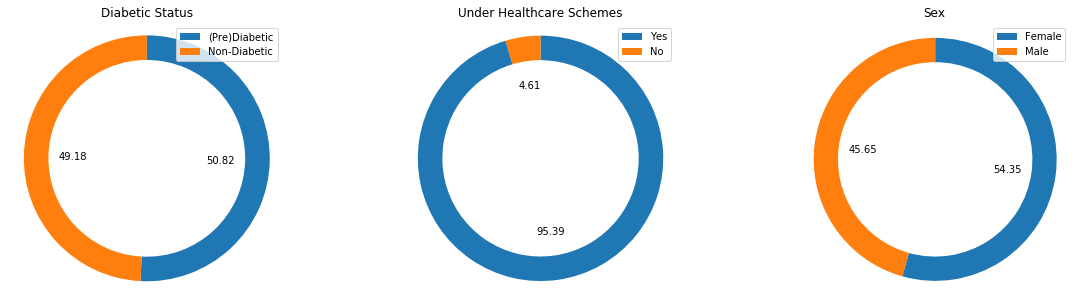

In [3]:
#setting a function that can help to authomatically create a piechart
def set_pie(df, col):
    sorted_counts = df[col].value_counts()
    
    plt.pie(sorted_counts, labels = None, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, radius=2, autopct='%.02f');
    plt.axis('square')
    plt.legend(sorted_counts.index)
  

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)
set_pie(diabetes_clean, 'Diabetes_binary')
plt.title('Diabetic Status');

plt.subplot(1, 3, 2)
set_pie(diabetes_clean, 'AnyHealthcare')
plt.title('Under Healthcare Schemes');

plt.subplot(1, 3, 3)
set_pie(diabetes_clean, 'Sex')
plt.title('Sex');

## Distribution of BMI
One main key feature to check out its distribution is that of the BMI because of its relation with Diabetes from residual knowledge. In the chart, the distribution is unimodal and skewed to the right. The mode BMI can also be depicted to be 30, with a few entry with BMI value of 50 and above.

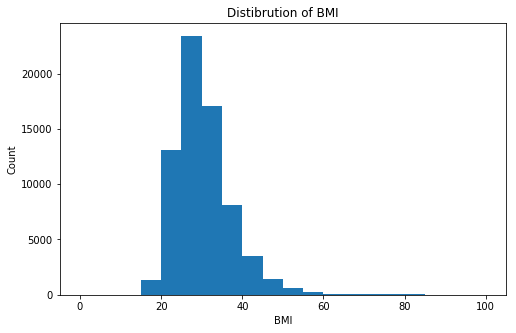

In [4]:
#checking the BMI distribution...

bins = np.arange(0, diabetes_clean['BMI'].max()+5, 5)

plt.figure(figsize=[8, 5])
plt.hist(data=diabetes_clean, x='BMI', bins=bins);
plt.ylabel('Count')
plt.xlabel('BMI')
plt.title('Distibrution of BMI');

# Diabetes status vs HighBP

Checking for the relationship of the diabetes status with the High blood pressure, it is obvious from the chart that being (Pre)Diabetic tends to increase the chance of having a high blood pressure and vice versa.

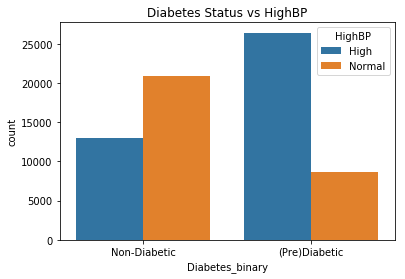

In [5]:
#the relationship between diabetes and HighBP
sb.countplot(data = diabetes_clean, x = 'Diabetes_binary', hue = 'HighBP');
plt.title('Diabetes Status vs HighBP');

# Diabetic status in relation to sex

From the looks, Sex also has its role to play in the chance of being diabetic or not as females tends to have more occurrence of diabetes compared to their male counterparts. Although we can not fully as we have more female entries compared to males.

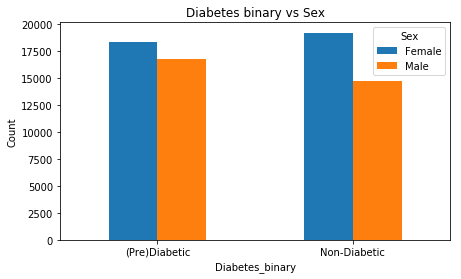

In [7]:
#checking for relationship between diabetic_binary and sex
diabetes_clean.groupby('Diabetes_binary')['Sex'].value_counts().unstack().plot.bar(rot=0, figsize=(7,4));
plt.ylabel('Count')
plt.title('Diabetes binary vs Sex');

# Income, PhysHlth and MentHlth in relation to  No access to doctors and Diabetic status

The multivariate representation of Income, Physical/Mental health difficuties, access to doctors due to cost and Diabetic status is strikingly intersting from the plots. High income class have lesser health difficulties, more access to doctors, and low risk of being diabetic as compared to other classes.

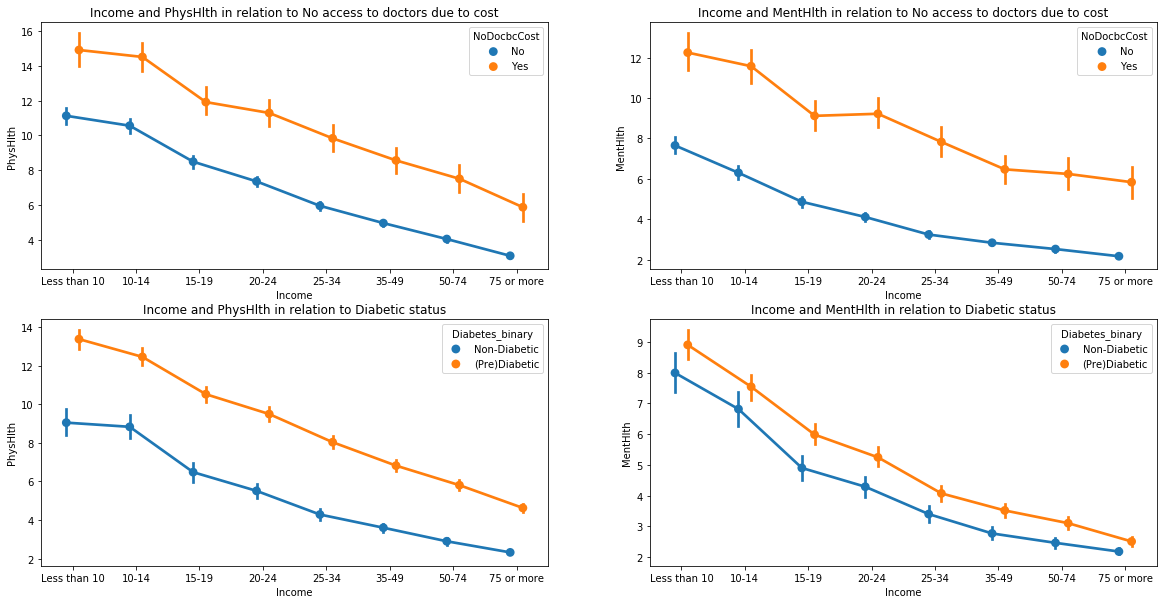

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
order = ['Less than 10', '10-14', '15-19', '20-24', '25-34', '35-49', '50-74', '75 or more']
ax = sb.pointplot(data = diabetes_clean, x = 'Income', y = 'PhysHlth', hue = 'NoDocbcCost',
                  dodge = 0.2, order=order)
plt.title('Income and PhysHlth in relation to No access to doctors due to cost')

plt.subplot(2,2,2)
order = ['Less than 10', '10-14', '15-19', '20-24', '25-34', '35-49', '50-74', '75 or more']
ax = sb.pointplot(data = diabetes_clean, x = 'Income', y = 'MentHlth', hue = 'NoDocbcCost',
                  dodge = 0.2, order=order)
plt.title('Income and MentHlth in relation to No access to doctors due to cost')

plt.subplot(2,2,3)
order = ['Less than 10', '10-14', '15-19', '20-24', '25-34', '35-49', '50-74', '75 or more']
ax = sb.pointplot(data = diabetes_clean, x = 'Income', y = 'PhysHlth', hue = 'Diabetes_binary',
                  dodge = 0.2, order=order)
plt.title('Income and PhysHlth in relation to Diabetic status')

plt.subplot(2,2,4)
order = ['Less than 10', '10-14', '15-19', '20-24', '25-34', '35-49', '50-74', '75 or more']
ax = sb.pointplot(data = diabetes_clean, x = 'Income', y = 'MentHlth', hue = 'Diabetes_binary',
                  dodge = 0.2, order=order)
plt.title('Income and MentHlth in relation to Diabetic status');


# Education, PhysHlth and MentHlth in relation to No access to doctors and Diabetic status

Education also greatly affects physical/mental health in realtion to access to doctors and diabetic status. Class with high level of education also tend to have more access to doctors, reduced physical/mental health difficulties and lesser risk of being diabetic.

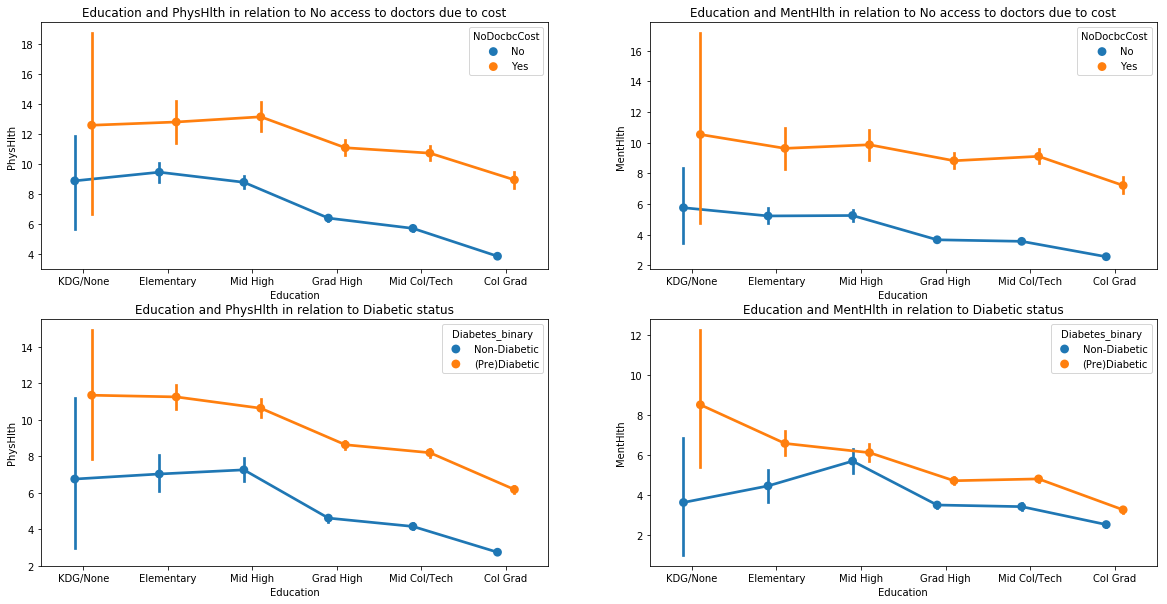

In [9]:
plt.figure(figsize=(20,10))
order = ['KDG/None', 'Elementary', 'Mid High', 'Grad High', 'Mid Col/Tech', 'Col Grad']
plt.subplot(2,2,1)
ax = sb.pointplot(data = diabetes_clean, x = 'Education', y = 'PhysHlth', hue = 'NoDocbcCost',
                  dodge = 0.2, order=order)
plt.title('Education and PhysHlth in relation to No access to doctors due to cost')

plt.subplot(2,2,2)
ax = sb.pointplot(data = diabetes_clean, x = 'Education', y = 'MentHlth', hue = 'NoDocbcCost',
                  dodge = 0.2, order=order)
plt.title('Education and MentHlth in relation to No access to doctors due to cost')

plt.subplot(2,2,3)
ax = sb.pointplot(data = diabetes_clean, x = 'Education', y = 'PhysHlth', hue = 'Diabetes_binary',
                  dodge = 0.2, order=order)
plt.title('Education and PhysHlth in relation to Diabetic status')

plt.subplot(2,2,4)
ax = sb.pointplot(data = diabetes_clean, x = 'Education', y = 'MentHlth', hue = 'Diabetes_binary',
                  dodge = 0.2, order=order)
plt.title('Education and MentHlth in relation to Diabetic status');

### Generate Slideshow
Using jupyter nbconvert to generate slide deck

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 580128 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 